In [2]:
import numpy as np
import numpy.linalg as la
from scipy.sparse import diags
import matplotlib.pyplot as plt
import yt
from IPython.display import Image

def plotter(file, p1, p2, save):
    ds = yt.load(file+'.e', step=-1)
    
    vec = [('all', 'temp')]
    field_label = {('all', 'temp'): r'$temp$'}
        
    plt = yt.LinePlot(ds, vec,
                      [p1[0], p1[1], p1[2]], [p2[0], p2[1], p2[2]],
                      1000, field_labels=field_label)

    plt.annotate_legend(('all', 'temp'))
    plt.set_x_unit('cm')
    plt.set_xlabel('z (cm)')
    # plt.set_ylabel(r'Fluxes ($\mathrm{10^{13}cm^{-2} s^{-1}}$)')
    plt.set_ylabel('Temp')
    plt._setup_plots()
    # plt.save(save + '.png')
    plt.show()

# TH-temp3

yt : [WARNING  ] 2020-06-20 14:38:51,812 name_glo_var not found
yt : [WARNING  ] 2020-06-20 14:38:51,815 No info_records found
yt : [WARNING  ] 2020-06-20 14:38:51,817 name_elem_var not found
yt : [INFO     ] 2020-06-20 14:38:51,819 Loading coordinates
yt : [INFO     ] 2020-06-20 14:38:51,821 Loading connectivity
yt : [INFO     ] 2020-06-20 14:38:51,848 Parameters: current_time              = 1.0
yt : [INFO     ] 2020-06-20 14:38:51,849 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2020-06-20 14:38:51,851 Parameters: domain_left_edge          = [ -0.564 -79.3     0.   ]
yt : [INFO     ] 2020-06-20 14:38:51,852 Parameters: domain_right_edge         = [  6.204 872.3     1.   ]
yt : [INFO     ] 2020-06-20 14:38:51,853 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-06-20 14:38:51,854 Loading coordinates
yt : [INFO     ] 2020-06-20 14:38:51,856 Loading connectivity
yt : [WARNING  ] 2020-06-20 14:38:51,866 name_elem_var not found



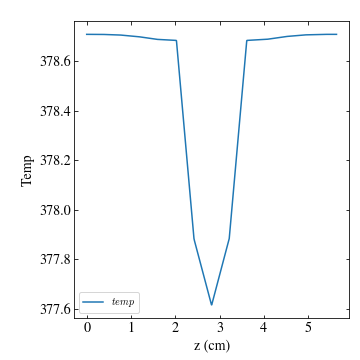

In [7]:
# Steady-state
base = '/home/roberto/projects/moltres/problems/mhtgr350/'
file = base + 'TH-temp3'
save = base + 'scripts/figures/TH1'
#plotter(file, [0.94, 0, 0], [0.94, 793, 0], save)
#plotter(file, [0.94+1.88, 0, 0], [0.94+1.88, 793, 0], save)
plotter(file, [0, 400, 0], [5.64, 400, 0], save)

# TH-temp4

yt : [WARNING  ] 2020-06-20 14:59:55,823 name_glo_var not found
yt : [WARNING  ] 2020-06-20 14:59:55,826 No info_records found
yt : [WARNING  ] 2020-06-20 14:59:55,828 name_elem_var not found
yt : [INFO     ] 2020-06-20 14:59:55,830 Loading coordinates
yt : [INFO     ] 2020-06-20 14:59:55,838 Loading connectivity
yt : [INFO     ] 2020-06-20 14:59:55,905 Parameters: current_time              = 1.0
yt : [INFO     ] 2020-06-20 14:59:55,905 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2020-06-20 14:59:55,906 Parameters: domain_left_edge          = [  -0.564 -267.3      0.   ]
yt : [INFO     ] 2020-06-20 14:59:55,907 Parameters: domain_right_edge         = [6.2040e+00 1.0203e+03 1.0000e+00]
yt : [INFO     ] 2020-06-20 14:59:55,908 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-06-20 14:59:55,909 Loading coordinates
yt : [INFO     ] 2020-06-20 14:59:55,917 Loading connectivity
yt : [WARNING  ] 2020-06-20 14:59:55,945 name_elem_var not found



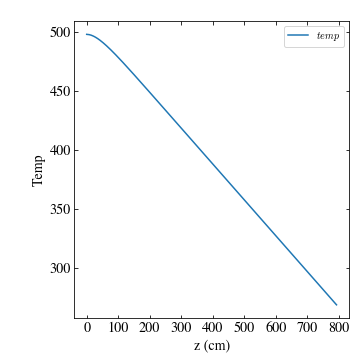

yt : [WARNING  ] 2020-06-20 15:00:22,363 name_glo_var not found
yt : [WARNING  ] 2020-06-20 15:00:22,368 No info_records found
yt : [WARNING  ] 2020-06-20 15:00:22,372 name_elem_var not found
yt : [INFO     ] 2020-06-20 15:00:22,375 Loading coordinates
yt : [INFO     ] 2020-06-20 15:00:22,387 Loading connectivity
yt : [INFO     ] 2020-06-20 15:00:22,451 Parameters: current_time              = 1.0
yt : [INFO     ] 2020-06-20 15:00:22,452 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2020-06-20 15:00:22,452 Parameters: domain_left_edge          = [  -0.564 -267.3      0.   ]
yt : [INFO     ] 2020-06-20 15:00:22,454 Parameters: domain_right_edge         = [6.2040e+00 1.0203e+03 1.0000e+00]
yt : [INFO     ] 2020-06-20 15:00:22,455 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-06-20 15:00:22,456 Loading coordinates
yt : [INFO     ] 2020-06-20 15:00:22,468 Loading connectivity
yt : [WARNING  ] 2020-06-20 15:00:22,496 name_elem_var not found


In [ ]:
# Steady-state
base = '/home/roberto/projects/moltres/problems/mhtgr350/'
file = base + 'TH-temp4'
save = base + 'scripts/figures/TH2'
plotter(file, [0.94, 0, 0], [0.94, 793, 0], save)
plotter(file, [0.94+1.88, 0, 0], [0.94+1.88, 793, 0], save)
plotter(file, [0, 400, 0], [5.64, 400, 0], save)